In [7]:
import csv
import numpy as np

def get_column_data(filename, column_name):
    with open(filename, newline='', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        column_data = [row[column_name] for row in reader]
    return np.array(column_data, dtype=float)

filename = "C:/Users/wazovski/Downloads/russia_losses_equipment.csv"
APC_losses = get_column_data(filename, "APC")
APC_losses = APC_losses[::-1]
print(APC_losses)

[  516.   706.   706. ... 19339. 19355. 19369.]


In [8]:
daily_losses = np.diff(APC_losses)
print(daily_losses)

[190.   0. 110. ...  33.  16.  14.]


In [10]:
largest_losses = np.sort(daily_losses)[-5:]
print(largest_losses)

[ 91.  96. 110. 120. 190.]


In [11]:
import pandas as pd

def summer_losses_2023(filename, losses_column):
    """
    Рахує втрати БТР за літо 2023 року.
    
    Parameters:
        filename (str): Назва файлу CSV.
        losses_column (str): Назва стовпця з втратами.
        
    Returns:
        int: Загальні втрати за літо 2023 року.
    """
    data = pd.read_csv(filename, parse_dates=['date'])
    summer_data = data[(data['date'] >= "2023-06-01") & (data['date'] <= "2023-08-31")]
    return summer_data[losses_column].diff().fillna(0).sum()

summer_losses = summer_losses_2023(filename, "APC")
print("Втрати БТР влітку 2023 року:", int(summer_losses))


Втрати БТР влітку 2023 року: -1126


In [14]:
# Обчислюємо середнє значення втрат за 100-500 днів
def average_losses_in_range(losses, start_day, end_day):
    """
    Обчислює середнє значення втрат у заданому діапазоні днів.
    
    Parameters:
        losses (np.ndarray): Массив з даними про втрати.
        start_day (int): Початковий день (включно).
        end_day (int): Кінцевий день (включно).
        
    Returns:
        float: Середнє значення втрат.
    """
    return np.mean(losses[start_day:end_day])

# Викликаємо функцію для діапазону 100-500 днів
average_loss = average_losses_in_range(APC_losses, 100, 501)  # від 100 до 500 включно
print(f"Середнє значення втрат БТР за 100-500 днів: {average_loss}")


Середнє значення втрат БТР за 100-500 днів: 5823.032418952618


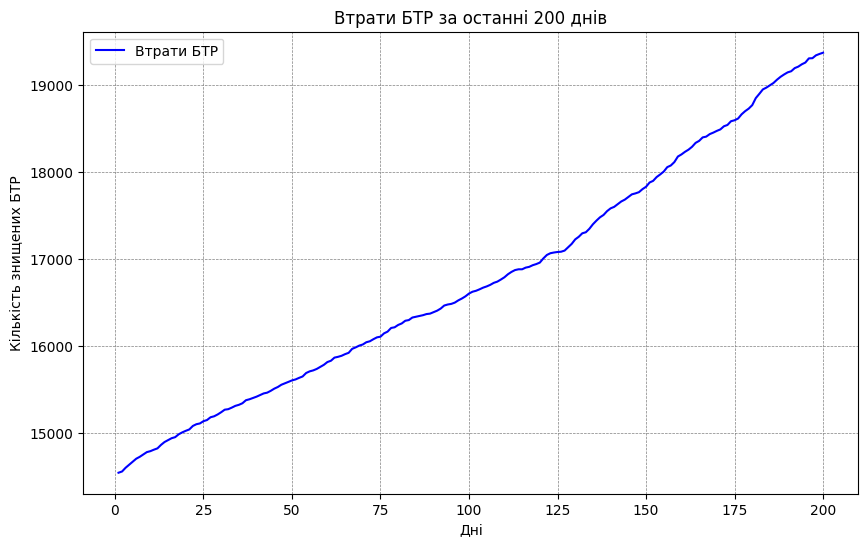

In [15]:
import matplotlib.pyplot as plt

def plot_last_200_days(losses, title="Втрати БТР за останні 200 днів"):
    """
    Створює графік втрат БТР за останні 200 днів.
    
    Parameters:
        losses (np.ndarray): Массив з даними про втрати.
        title (str): Назва графіку.
    """
    # Останні 200 днів
    last_200_losses = losses[-200:]
    days = np.arange(1, 201)  # Створюємо масив з чисел від 1 до 200 для осі X

    # Створення графіку
    plt.figure(figsize=(10, 6))
    plt.plot(days, last_200_losses, label="Втрати БТР", linestyle='-', color='b')  # Лінія графіку
    plt.title(title)
    plt.xlabel("Дні")
    plt.ylabel("Кількість знищених БТР")
    plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
    plt.legend()
    
    # Збереження графіку
    plt.savefig("APC_losses_last_200_days.png", dpi=100)
    plt.show()

# Створюємо графік для останніх 200 днів
plot_last_200_days(APC_losses)

